In [1]:
import tensorflow as tf
import numpy as np
import sys
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# 載入模型
model = tf.keras.models.load_model("resnet50_embed_model")
print("✅ 模型載入成功！")




✅ 模型載入成功！


In [2]:
# 圖片前處理函數
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # 對應 ImageNet 正規化（和 ResNet50 一致）
    img_array = tf.keras.applications.resnet50.preprocess_input(img_array)
    return img_array


In [3]:
# 預測函數
def predict_embedding(img_path):
    input_tensor = preprocess_image(img_path)
    embedding = model.predict(input_tensor)[0]
    return embedding



1/1 [==============================] - 3s 3s/step
✅ Embedding 產出成功！維度：(2048,)
前10維向量值： [522.6496   146.70236  109.72875  540.4931     8.524139   0.
 121.02975    0.        43.584404   0.      ]


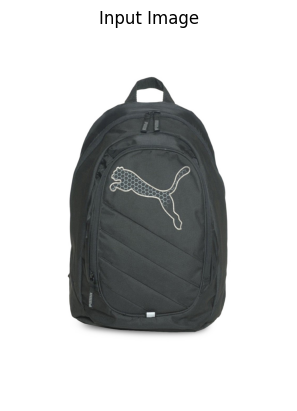

: 

In [ ]:
# 主程式邏輯
if __name__ == "__main__":
    # if len(sys.argv) < 2:
    #     print("❗請提供圖片路徑，例如：python predict.py path/to/image.jpg")
    #     sys.exit()

    img_path = "../fashion-dataset/fashion-dataset/images/1526.jpg"
    emb = predict_embedding(img_path)

    print(f"✅ Embedding 產出成功！維度：{emb.shape}")
    print("前10維向量值：", emb[:10])

    # 顯示圖片
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title("Input Image")
    plt.axis("off")
    plt.show()
